In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("rumahku.csv")
df

,Unnamed: 0,harga,kamar_tidur,kamar_mandi,luas_bangunan,luas_tanah,garasi,taman,keamanan 24 jam,carport,kecamatan
0,0,2.650000e+08,2.0,1.0,36.0,60.0,1,yes,no,yes,tembalang
1,1,2.650000e+08,2.0,1.0,36.0,60.0,1,yes,no,yes,semarang timur
2,2,2.650000e+08,2.0,1.0,36.0,72.0,1,no,no,yes,banyumanik
3,3,2.650000e+08,2.0,1.0,36.0,72.0,0,yes,no,no,tembalang
4,4,2.650000e+08,2.0,1.0,45.0,84.0,1,no,no,no,pedurungan
...,...,...,...,...,...,...,...,...,...,...,...
1704,2014,9.750000e+08,2.0,2.0,90.0,90.0,2,no,no,no,tembalang
1705,2015,9.800000e+08,3.0,1.0,60.0,120.0,1,no,no,no,mijen
1706,2016,9.950000e+08,8.0,8.0,120.0,120.0,0,no,no,no,gajah mungkur
1707,2017,9.981980e+08,3.0,2.0,60.0,84.0,2,no,yes,yes,tembalang


In [30]:
df=df.drop(["Unnamed: 0"],axis=1)

In [31]:
df["kamar_tidur"]=df["kamar_tidur"].astype("int64")
df["kamar_mandi"]=df["kamar_mandi"].astype("int64")
df["luas_bangunan"]=df["luas_bangunan"].astype("int64")
df["luas_tanah"]=df["luas_tanah"].astype("int64")

In [32]:
df.head()

,harga,kamar_tidur,kamar_mandi,luas_bangunan,luas_tanah,garasi,taman,keamanan 24 jam,carport,kecamatan
0,265000000.0,2,1,35,60,1,yes,no,yes,tembalang
1,265000000.0,2,1,35,60,1,yes,no,yes,semarang timur
2,265000000.0,2,1,35,71,1,no,no,yes,banyumanik
3,265000000.0,2,1,35,71,0,yes,no,no,tembalang
4,265000000.0,2,1,45,84,1,no,no,no,pedurungan


In [39]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  harga
capping the  kamar_tidur
capping the  kamar_mandi
capping the  luas_bangunan
capping the  luas_tanah
capping the  garasi
capping the  taman
capping the  keamanan 24 jam
capping the  carport
capping the  kecamatan


In [47]:
from scipy.stats import norm, skew
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings 
warnings.simplefilter('ignore')
import numpy as np
algos = [LinearRegression(normalize=True),KNeighborsRegressor(), DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor()]

names = ['Linear Regression','K Neighbors Regressor', 'Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor']




In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['kecamatan','taman','keamanan 24 jam','carport']

for i in var_mod:
    df[i] = le.fit_transform(df[i])

from sklearn.model_selection import train_test_split
y = df['harga']
X = df.drop(['harga'] ,axis  = 1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [50]:
rmse_list = []
r2_score_train=[]
r2_score_test=[]
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_train_pred2 = model.predict(X_train)
    y_pred2 = model.predict(X_test)
    train_2_score =r2_score(y_train_pred2, y_train)
    test_2_score  = r2_score(y_test, y_pred2)
    train_mse2 = mean_squared_error(y_train_pred2, y_train)
    test_mse2 = mean_squared_error(y_pred2, y_test)
    train_rmse2 = np.sqrt(train_mse2)
    test_rmse2 = np.sqrt(test_mse2)
    rmse_list.append(test_rmse2)
    r2_score_train.append(train_2_score)
    r2_score_test.append(test_2_score)


In [51]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list,
                           'train r2 score':r2_score_train,
                           'test r2 scrore ':r2_score_test })

evaluation

,Model,RMSE,train r2 score,test r2 scrore
0,Linear Regression,0.398425,0.703943,0.750313
1,K Neighbors Regressor,0.371143,0.838180,0.783338
2,Decision Tree Regressor,0.298443,0.997514,0.859905
3,Random Forest Regressor,0.263332,0.982088,0.890929
4,XGBoost Regressor,0.268812,0.992344,0.886342


In [65]:
rf_model =  RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_train_pred2 = rf_model.predict(X_train)
y_pred2 = rf_model.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

Train r2 score:  0.9825384555354716
Test r2 score:  0.8911168837312925
Train RMSE: 0.0973
Test RMSE: 0.2631


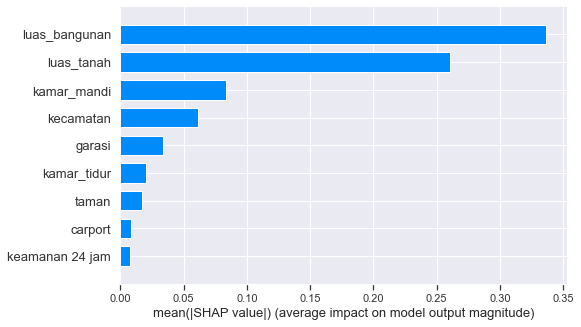

In [53]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [54]:
values = [i for i in range(1, 21)]
train_scores=[]
test_scores=[]
for i in values:
	# configure the model
	model = RandomForestRegressor(max_depth=i)
	model.fit(X_train, y_train)
	y_train_pred2 = model.predict(X_train)
	train_acc =r2_score(y_train_pred2, y_train)
	y_pred2 = model.predict(X_test)
	test_acc= r2_score(y_test, y_pred2)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.210, test: 0.645
>2, train: 0.599, test: 0.747
>3, train: 0.708, test: 0.783
>4, train: 0.770, test: 0.801
>5, train: 0.820, test: 0.818
>6, train: 0.867, test: 0.836
>7, train: 0.907, test: 0.855
>8, train: 0.935, test: 0.865
>9, train: 0.954, test: 0.876
>10, train: 0.967, test: 0.884
>11, train: 0.975, test: 0.886
>12, train: 0.978, test: 0.887
>13, train: 0.981, test: 0.889
>14, train: 0.982, test: 0.888
>15, train: 0.982, test: 0.892
>16, train: 0.982, test: 0.889
>17, train: 0.982, test: 0.890
>18, train: 0.982, test: 0.894
>19, train: 0.982, test: 0.894
>20, train: 0.982, test: 0.893


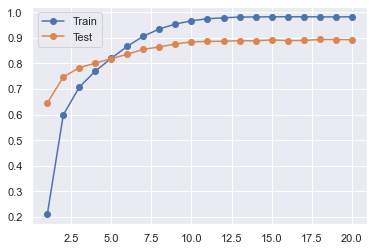

In [55]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [62]:
df = pd.read_csv("rumahku.csv")
df

,Unnamed: 0,harga,kamar_tidur,kamar_mandi,luas_bangunan,luas_tanah,garasi,taman,keamanan 24 jam,carport,kecamatan
0,0,2.650000e+08,2.0,1.0,36.0,60.0,1,yes,no,yes,tembalang
1,1,2.650000e+08,2.0,1.0,36.0,60.0,1,yes,no,yes,semarang timur
2,2,2.650000e+08,2.0,1.0,36.0,72.0,1,no,no,yes,banyumanik
3,3,2.650000e+08,2.0,1.0,36.0,72.0,0,yes,no,no,tembalang
4,4,2.650000e+08,2.0,1.0,45.0,84.0,1,no,no,no,pedurungan
...,...,...,...,...,...,...,...,...,...,...,...
1704,2014,9.750000e+08,2.0,2.0,90.0,90.0,2,no,no,no,tembalang
1705,2015,9.800000e+08,3.0,1.0,60.0,120.0,1,no,no,no,mijen
1706,2016,9.950000e+08,8.0,8.0,120.0,120.0,0,no,no,no,gajah mungkur
1707,2017,9.981980e+08,3.0,2.0,60.0,84.0,2,no,yes,yes,tembalang


In [63]:
df["kamar_tidur"]=df["kamar_tidur"].astype("int64")
df["kamar_mandi"]=df["kamar_mandi"].astype("int64")
df["luas_bangunan"]=df["luas_bangunan"].astype("int64")
df["luas_tanah"]=df["luas_tanah"].astype("int64")

In [64]:
#df.to_csv("rumahku.csv")